# ⏳💸 LIFE EXPECTANCY / GDP PROJECT ⏳💸

## Import Packages

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np  
from numerize.numerize import numerize

## Read and Inspect Data

In [20]:
df= pd.read_csv('all_data.csv')
df.head(10)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.300000000,77860932152.000000000
1,Chile,2001,77.300000000,70979923960.000000000
2,Chile,2002,77.800000000,69736811435.000000000
3,Chile,2003,77.900000000,75643459840.000000000
4,Chile,2004,78.000000000,99210392858.000000000
5,Chile,2005,78.400000000,122965000000.000000000
6,Chile,2006,78.900000000,154788000000.000000000
7,Chile,2007,78.900000000,173606000000.000000000
8,Chile,2008,79.600000000,179638000000.000000000
9,Chile,2009,79.300000000,172389000000.000000000


In [21]:
print(str(df.dtypes), str(df.columns)+'\n'+ str(df['Country'].unique()))

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [16]:
w = df.groupby('Country').GDP.mean().reset_index()
w.sort_values(by='GDP',ascending=False)

,Country,GDP
4,USA,14075000000000.000000000
1,China,4957713750000.000000000
2,Germany,3094775625000.000000000
3,Mexico,976650625000.000000000
0,Chile,169788845015.312500000
5,Zimbabwe,9062579595.062500000


In [15]:
w1 = df.pivot(columns='Year', 
         index='Country', 
         values='GDP').reset_index() 

w1

Year,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Chile,77860932152.000000000,70979923960.000000000,69736811435.000000000,75643459840.000000000,99210392858.000000000,122965000000.000000000,154788000000.000000000,173606000000.000000000,179638000000.000000000,172389000000.000000000,218538000000.000000000,252252000000.000000000,267122000000.000000000,278384000000.000000000,260990000000.000000000,242518000000.000000000
1,China,1211350000000.000000000,1339400000000.000000000,1470550000000.000000000,1660290000000.000000000,1955350000000.000000000,2285970000000.000000000,2752130000000.000000000,3552180000000.000000000,4598210000000.000000000,5109950000000.000000000,6100620000000.000000000,7572550000000.000000000,8560550000000.000000000,9607220000000.000000000,10482400000000.000000000,11064700000000.000000000
2,Germany,1949950000000.000000000,1950650000000.000000000,2079140000000.000000000,2505730000000.000000000,2819250000000.000000000,2861410000000.000000000,3002450000000.000000000,3439950000000.000000000,3752370000000.000000000,3418010000000.000000000,3417090000000.000000000,3757700000000.000000000,3543980000000.000000000,3752510000000.000000000,3890610000000.000000000,3375610000000.000000000
3,Mexico,683648000000.000000000,724704000000.000000000,741560000000.000000000,713284000000.000000000,770268000000.000000000,866346000000.000000000,965281000000.000000000,1043470000000.000000000,1101280000000.000000000,894949000000.000000000,1051130000000.000000000,1171190000000.000000000,1186600000000.000000000,1261980000000.000000000,1298460000000.000000000,1152260000000.000000000
4,USA,10300000000000.000000000,10600000000000.000000000,11000000000000.000000000,11500000000000.000000000,12300000000000.000000000,13100000000000.000000000,13900000000000.000000000,14500000000000.000000000,14700000000000.000000000,14400000000000.000000000,15000000000000.000000000,15500000000000.000000000,16200000000000.000000000,16700000000000.000000000,17400000000000.000000000,18100000000000.000000000
5,Zimbabwe,6689957600.000000000,6777384700.000000000,6342116400.000000000,5727591800.000000000,5805598400.000000000,5755215200.000000000,5443896500.000000000,5291950100.000000000,4415702800.000000000,8621573608.000000000,10141859710.000000000,12098450749.000000000,14242490252.000000000,15451768659.000000000,15891049236.000000000,16304667807.000000000


## Transform and Cleansing the data 

### Preventing scientific notation due GDP column large numbers

In [14]:
pd.set_option('display.float_format', lambda x: '%.9f' % x)
#pd.reset_option('display')

### Changing column name and column value for better readability

In [22]:
df.rename(columns={
    'Life expectancy at birth (years)': 'Life_Expectancy'},
    inplace=True)

In [23]:
# Applying the condition
df['Country'].mask(df['Country'] == 'United States of America', 'USA', inplace=True)

## Visualizations

#### 🖱️ 👨‍💻 Note you can interact with the plotly graphs by zooming in/out, by clicking/selecting the legend values or drawing a box selection 👨‍💻 🖱️


### Life expectancy / GDP growth & correlation over time in the six nations (Animated Charts)


In [24]:
# Create the figure
fig = go.Figure(layout=go.Layout(height=900, width=1800))

# Plot the data
fig = px.scatter(df, x="GDP", y="Life_Expectancy", animation_frame="Year", animation_group="Country", color="Country", hover_name="Country", size='Life_Expectancy',
                 size_max=25, range_x=[np.amin(df.GDP)*0.5, np.amax(df.GDP)*1.25], range_y=[30, 90], text="Country", log_x=True, color_discrete_map={"Chile": "firebrick", "China": "crimson", "Germany": "black", "Mexico": "green", "USA": "midnightblue", "Zimbabwe": "black"})


# Set background color, font and x-ticks
fig.update_layout(plot_bgcolor='white',
                  font=dict(color="#231F20", size=12), showlegend=False, 
                  xaxis=dict(
                      tickmode='linear',
                      tick0=10000000000,
                      dtick=- 0.1
                  )
                  )

# Centraliza text of the points
fig.update_traces(textposition='bottom center')

# create the data source of the graph
fig.add_annotation(text = "Data Source: codeacademy.com",
                    xref = "paper",
                    yref = "paper",
                    x = -0.005,
                    y = -0.145,
                    showarrow = False,
                    font = dict(size = 12),
                    align = "left",
                    xanchor = "left")
# create author of the graph
fig.add_annotation(text = "Author: Felipe Oliveira",
                    xref = "paper",
                    yref = "paper",
                    x = 1.005,
                    y = -0.145,
                    showarrow = False,
                    font = dict(size = 12),
                    align = "right",
                    xanchor = "right")

# Graph title annotation
fig.add_annotation(text = "GDP & LIFE EXPECTANCY GROWTH OVER TIME (2000-2015)",
                    xref = "paper",
                    yref = "paper",
                    x = 0.32,
                    y = 1.10,
                    showarrow = False,
                    xanchor = "left",
                    font = dict(color = "#404647", size = 18))

# Fix renderization of the graph for VS Code
fig.show(renderer='notebook_connected')


#### 🇨🇳 🆚 🇺🇸

In [28]:
#Create the figure
fig = go.Figure(layout=go.Layout(height=700, width=1900))

#Plot the data
fig = px.scatter(df.query("Country == 'China' or Country == 'USA'"), x="GDP", y="Life_Expectancy", animation_frame="Year", color='Country', animation_group="Country", hover_name="Country", size='GDP',
            size_max=80 , range_x=[np.amin(df.GDP)*0.5,np.amax(df.GDP)*1.25], range_y=[30,90], text='Country',template='plotly_dark')

fig.update_layout(showlegend = False)
#fig.update_traces(textposition='bottom center')
#create the data source of the graph
fig.add_annotation(text = "Data Source: codeacademy.com",
                    xref = "paper",
                    yref = "paper",
                    x = -0.005,
                    y = -0.145,
                    showarrow = False,
                    font = dict(size = 12),
                    align = "left",
                    xanchor = "left")
#create author of the graph
fig.add_annotation(text = "Author: Felipe Oliveira",
                    xref = "paper",
                    yref = "paper",
                    x = 1.005,
                    y = -0.145,
                    showarrow = False,
                    font = dict(size = 12),
                    align = "right",
                    xanchor = "right")

#graph title annotation
fig.add_annotation(text = "CHINA VS USA - GDP & LIFE EXPECTANCY GROWTH OVER TIME (2000-2015)",
                    xref = "paper",
                    yref = "paper",
                    x = 0.32,
                    y = 1.10,
                    showarrow = False,
                    xanchor = "left",
                    font = dict(color = "white", size = 18))


#title='CHINA VS USA - GDP & LIFE EXPECTANCY', ,template='plotly_dark'
fig.show(renderer='notebook_connected')

In [27]:
fig = px.scatter(df.sort_values('GDP', ascending=False), x="Life_Expectancy",y='GDP', facet_col="Country", color='Country', facet_col_wrap=2,facet_col_spacing=0.04, color_discrete_map={"Chile":"darkblue", "China":"crimson", "Germany":"black", "Mexico":"darkslategray", "USA":"darkslateblue","Zimbabwe":"black"}, title='GDP VS LIVE EXPECTANCY CORRELATION')


# Set options common to all traces with fig.update_traces
fig.update_traces(mode='markers+lines', marker_line_width=1.10, marker_size=8)
fig.update_layout(
    autosize=False,
    width=1200,
    height=800)


# Prevent that interacting with one column changes all 
fig.update_yaxes(matches=None,showticklabels=True)
fig.update_xaxes(matches=None,showticklabels=True)
fig.show()

### Average, min and max life expectancy / GDP

In [50]:
avg_le = np.average(df['Life_Expectancy'])
median_le = np.median(df['Life_Expectancy']) 
min_le = np.amin(df.Life_Expectancy)
min_gdp = np.amin(df.GDP)
max_le = np.amax(df.Life_Expectancy)
max_gdp = np.amax(df.GDP)
print('Life_Expectancy (years): Average: {}, Minimum value: {}, Maximum Value: {}'.format(avg_le,min,max))
print(f"GDP: Minimum value: {numerize(min_gdp)}, Maximum Value:  {numerize(max_gdp)}")
#print(f'Average Life_Expectancy:  {max_gdp}')

Life_Expectancy (years): Average: 72.78958333333334, Minimum value: 44.3, Maximum Value: 81
GDP: Minimum value: 4.42B, Maximum Value:  18.1T


Text(0.55, -0.2, '$\\bf{MAX\\  (YEARS)}$')

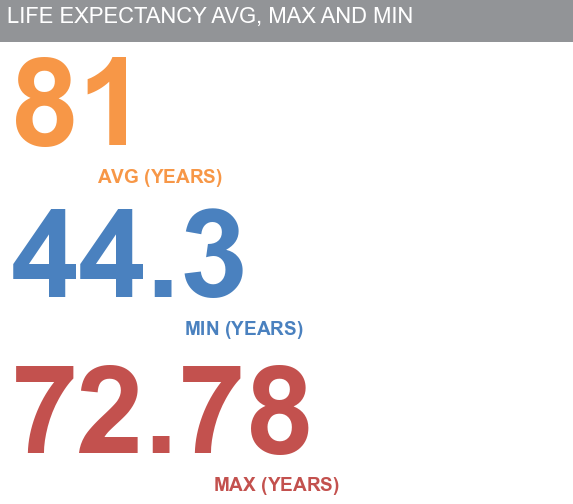

In [353]:
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

plt.figure(figsize=(5.2, 7) # width, height in inches
           )             # resolution of the figure


# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# remove chart tick labels
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.text(-0.16, 1.03,
         'LIFE EXPECTANCY AVG, MAX AND MIN'+' '*25,
         fontsize=22,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7, 'pad': 15, 'edgecolor': 'none'}) 


# add note to the plot
plt.text(-0.15, 0.71,
         '$\\bf{81}$', # use mathtext \\bf for bold text
         fontsize=122,
         color=ORANGE1)
# add note to the plot
plt.text(0.15, 0.61,
         # use mathtext \\bf for bold text
         '$\\bf{AVG\  (YEARS)}$',
         fontsize=19,
         color=ORANGE1)


plt.text(-0.15, 0.31,
         '$\\bf{44.3}$', # use mathtext \\bf for bold text
         fontsize=122,
         color=BLUE2)
plt.text(0.45, 0.21,
         # use mathtext \\bf for bold text
         '$\\bf{MIN\  (YEARS)}$',
         fontsize=19,
         color=BLUE2)


plt.text(-0.15, - 0.10,
         '$\\bf{72.78}$', # use mathtext \\bf for bold text
         fontsize=122,
         color=RED1)
plt.text(0.55, - 0.20,
         # use mathtext \\bf for bold text
         '$\\bf{MAX\  (YEARS)}$',
         fontsize=19,
         color=RED1)


Text(0.29, 0.11, '$\\bf{minimum\\ GDP\\  (USD)}$')

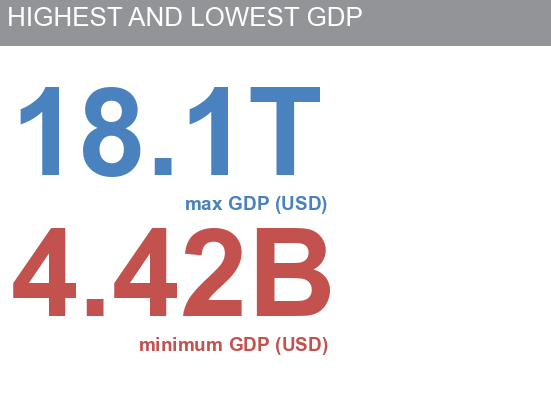

In [303]:
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

plt.figure(figsize=(5.2, 6.5), # width, height in inches
           )             # resolution of the figure

#dpi=110
# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# remove chart tick labels
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.text(-0.16, 1.03,
         'HIGHEST AND LOWEST GDP'+' '*25,
         fontsize=26,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7, 'pad': 15, 'edgecolor': 'none'}) 


# add note to the plot
plt.text(-0.15, 0.61,
         '$\\bf{18.1T}$', # use mathtext \\bf for bold text
         fontsize=122,
         color=BLUE2)
# add note to the plot
plt.text(0.45, 0.51,
         # use mathtext \\bf for bold text
         '$\\bf{max\ GDP\  (USD)}$',
         fontsize=19,
         color=BLUE2)

plt.text(-0.15, 0.21,
         '$\\bf{4.42B}$', # use mathtext \\bf for bold text
         fontsize=122,
         color=RED1)
plt.text(0.29, 0.11,
         # use mathtext \\bf for bold text
         '$\\bf{minimum\ GDP\  (USD)}$',
         fontsize=19,
         color=RED1)

#GDP: Minimum value: 4.42B, Maximum Value:  18.1T

### Life Expectancy Distribution

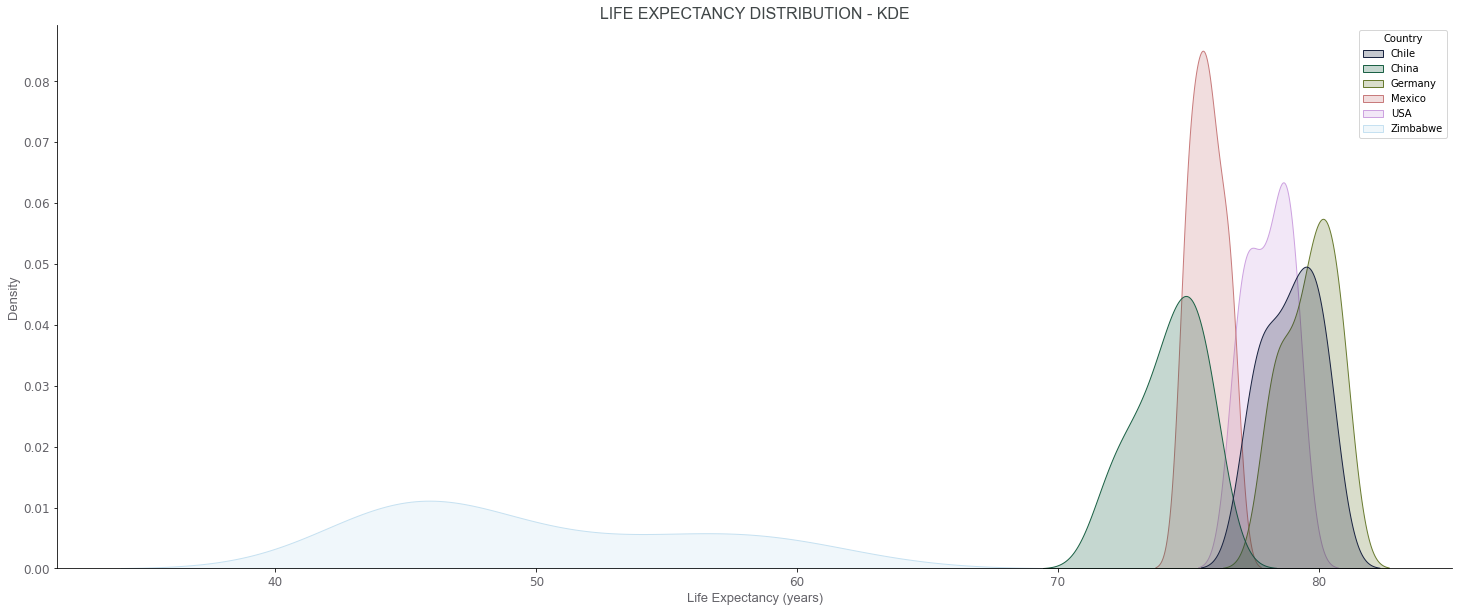

In [32]:
font_title = {'family': 'arial',
        'color':  '#404647',
        'weight': 'normal',
        'size': 16,
        }

font_labels = {'family': 'arial',
        'color':  '#646369',
        'weight': 'normal',
        'size': 13,
        }

fig, ax = plt.subplots(figsize=(25, 10)) 
sns.kdeplot(data=df, x="Life_Expectancy", hue="Country",shade=True, fill=True, palette="cubehelix")
plt.title('LIFE EXPECTANCY DISTRIBUTION - KDE', fontdict=font_title) 
plt.xlabel("Life Expectancy (years)",fontdict=font_labels)
plt.ylabel("Density",fontdict=font_labels)
plt.yticks(fontsize=12, color='#646369')
plt.xticks(fontsize=12, color='#646369')
sns.despine()

(array([40., 45., 50., 55., 60., 65., 70., 75., 80., 85.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

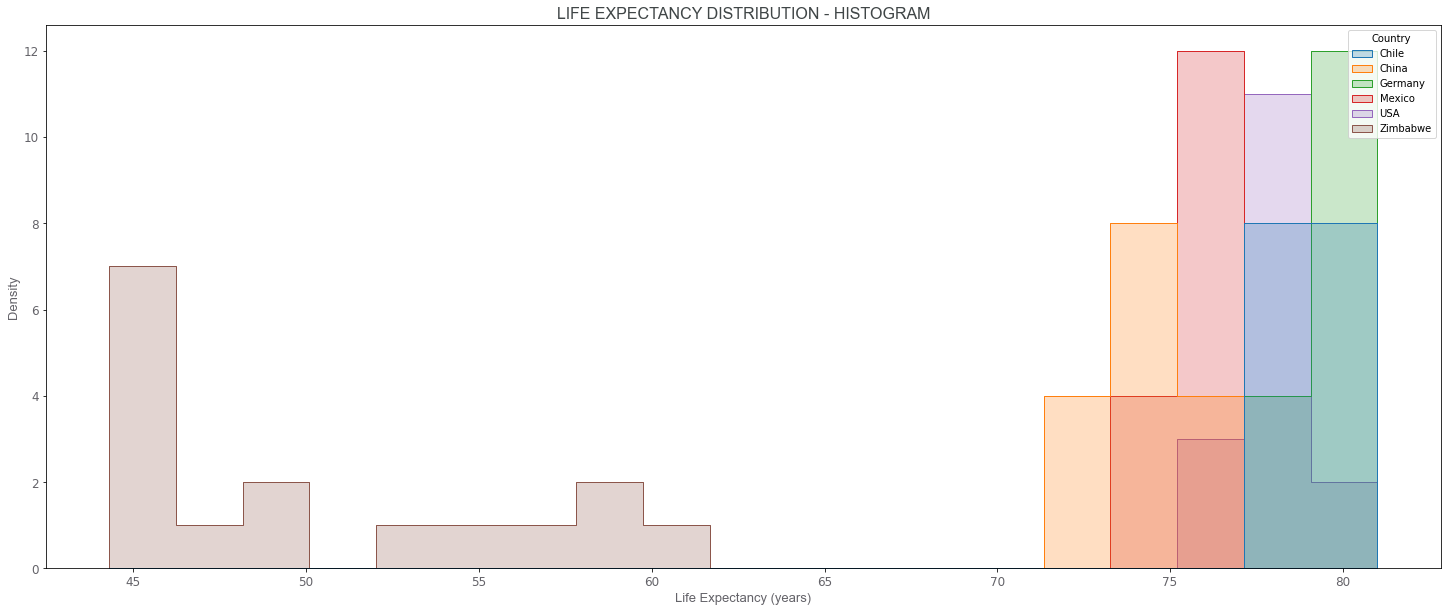

In [34]:
fig, ax = plt.subplots(figsize=(25, 10)) 
sns.histplot(data=df, x='Life_Expectancy', hue='Country', element="step")
plt.title('LIFE EXPECTANCY DISTRIBUTION - HISTOGRAM', fontdict=font_title) 
plt.xlabel("Life Expectancy (years)",fontdict=font_labels)
plt.ylabel("Density",fontdict=font_labels)
plt.yticks(fontsize=12, color='#646369')
plt.xticks(fontsize=12, color='#646369')

In [46]:
#Create the plot
fig = px.box(df, x = "Country", y = "Life_Expectancy", points="all", color="Country", template='presentation', title='LIFE EXPECTANCY DISTRIBUTION - BOX')
fig.show()

#Create the plot
fig = px.violin(df, y="Life_Expectancy", x="Country", color="Country",  points="all",
          hover_data=df.columns, template='presentation', title='LIFE EXPECTANCY DISTRIBUTION - VIOLIN')
fig.show()
